# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(89)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [2 1 1 ... 2 3 1]


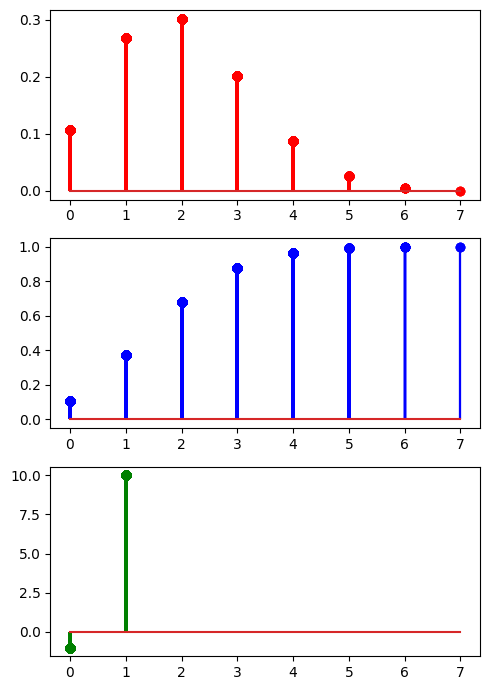

In [3]:
import matplotlib.pyplot as plt

np.random.seed(89)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [ ]:
# Funciones para distribuciones NORMALES:

from scipy.stats import norm

def dnorm(x, mean=0, std=1):
    """
    Calcula la densidad de probabilidad (PDF) de la distribución normal.
    """
    return norm.pdf(x, loc=mean, scale=std)


def pnorm(q, mean=0, std=1):
    """
    Calcula la función de distribución acumulada (CDF) de la distribución normal.
    """
    return norm.cdf(q, loc=mean, scale=std)


def qnorm(p, mean=0, std=1):
    """
    Calcula el cuantil (inversa de la CDF) de la distribución normal.
    """
    return norm.ppf(p, loc=mean, scale=std)


def rnorm(n, mean=0, std=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    return norm.rvs(loc=mean, scale=std, size=n)

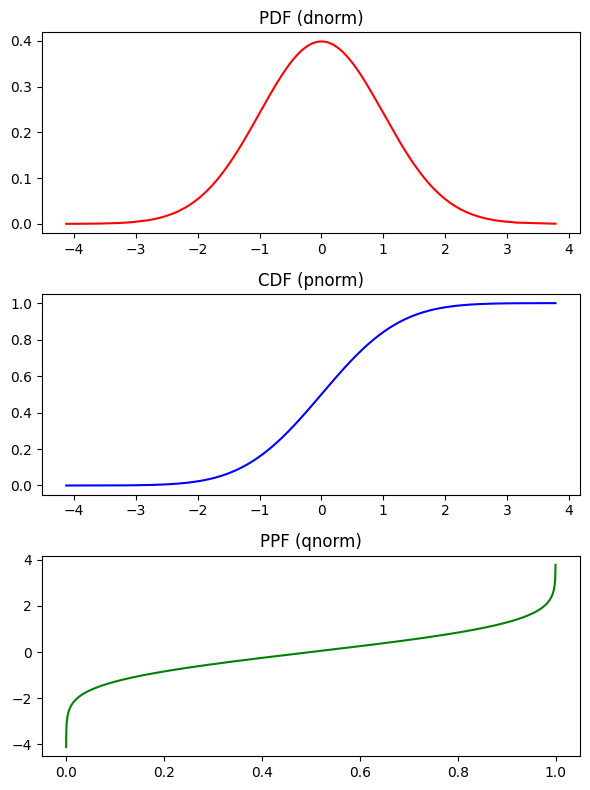

In [8]:
#Gráficos distribución NORMAL:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(89)

# Parámetros y muestra para la distribución normal:
media = 0
std = 1
data = np.sort(rnorm(2000, mean=media, std=std))

# Aplicar funciones para distribuciones normales:
pdf_vals = dnorm(data, mean=media, std=std)
cdf_vals = pnorm(data, mean=media, std=std)
ppf_vals = qnorm(cdf_vals, mean=media, std=std)

# Gráficos:
fig, axis = plt.subplots(3, 1, figsize=(6, 8))

# PDF
axis[0].plot(data, pdf_vals, color="red")
axis[0].set_title("PDF (dnorm)")

# CDF
axis[1].plot(data, cdf_vals, color="blue")
axis[1].set_title("CDF (pnorm)")

# PPF
axis[2].plot(cdf_vals, ppf_vals, color="green")
axis[2].set_title("PPF (qnorm)")

plt.tight_layout()
plt.show()

In [9]:
# Funciones para distribuciones UNIFORMES:

from scipy.stats import uniform


def dunif(x, low=0, high=1):
    """
    Calcula la densidad de probabilidad (PDF) de la distribución uniforme.
    """
    return uniform.pdf(x, loc=low, scale=high - low)

def punif(q, low=0, high=1):
    """
    Calcula la función de distribución acumulada (CDF) de la distribución uniforme.
    """
    return uniform.cdf(q, loc=low, scale=high - low)

def qunif(p, low=0, high=1):
    """
    Calcula el cuantil (inversa de la CDF) de la distribución uniforme.
    """
    return uniform.ppf(p, loc=low, scale=high - low)

def runif(n, low=0, high=1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    return uniform.rvs(loc=low, scale=high - low, size=n)

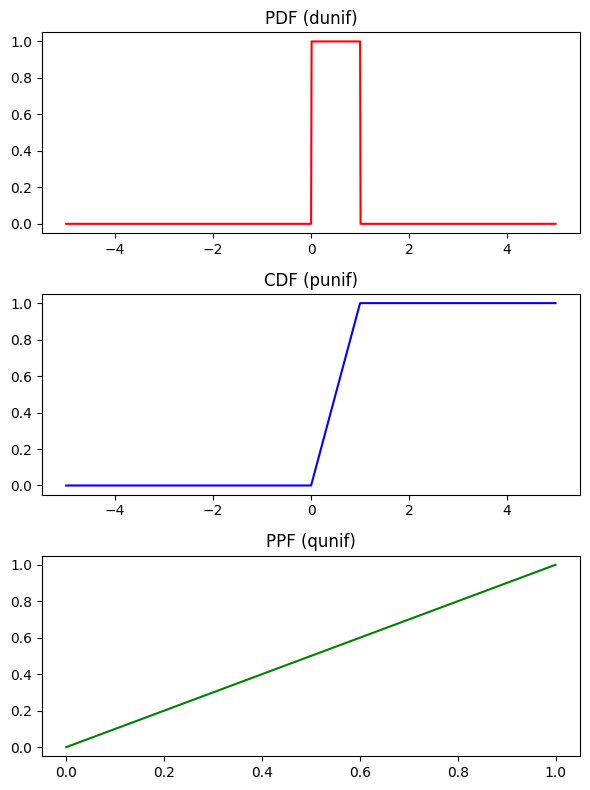

In [ ]:
#Gráficos distribución UNIFORME:

np.random.seed(89)

# Parámetros y muestra para la distribución uniforme
low = 0
high = 1
data = np.arange(-5, 5, 0.01)

# Calcular valores de las funciones
pdf_vals = dunif(data, low=low, high=high)
cdf_vals = punif(data, low=low, high=high)
ppf_vals = qunif(cdf_vals, low=low, high=high)  # Recuperar x a partir de cdf

# Gráficos
fig, axis = plt.subplots(3, 1, figsize=(6, 8))

# PDF
axis[0].plot(data, pdf_vals, color="red")
axis[0].set_title("PDF (dunif)")

# CDF
axis[1].plot(data, cdf_vals, color="blue")
axis[1].set_title("CDF (punif)")

# PPF
axis[2].plot(cdf_vals, ppf_vals, color="green")
axis[2].set_title("PPF (qunif)")

plt.tight_layout()
plt.show()